In [11]:
import os
import numpy as np
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
# from alexnet_FashionMnist import FashionMnist
from ptflops import get_model_complexity_info
# from resnet_FashionMnist import resnet_FashionMnist
# from vgg_FashionMnist import vgg
# from googlenet_FashionMnist import Googlenet
import sys

In [12]:
''' find the model path and the data path'''
# find the current path
currentpath = os.getcwd()
print('This path dir is: ', currentpath)

# find the parent dir of the parent dir
parentpath = os.path.dirname(os.path.dirname(currentpath))
print('The parent path dir is: ', parentpath)

################################################################################
# find the data path
datapath = os.path.join(parentpath, 'Data')
print('The data path dir is: ', datapath)
cifarpath_Data = os.path.join(datapath, 'CIFAR100')
fashionpath_Data = os.path.join(datapath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Data)
sys.path.append(fashionpath_Data)

# find the using model folder
model_path = os.path.join(fashionpath_Data, 'googlenet')
print('The training data are saved in: ', model_path)

# find the data path
sync_path = os.path.join(model_path, 'sync')
nosync_path = os.path.join(model_path, 'nosync')
print('The sync data are saved in: ', sync_path, '\n'
      'The nosync data are saved in: ', nosync_path)

################################################################################
# find the model path
modelpath = os.path.join(parentpath, 'Model')
print('The model path dir is: ', modelpath)
cifarpath_Model = os.path.join(modelpath, 'CIFAR100')
fashionpath_Model = os.path.join(modelpath, 'FashionMNIST')

# 将sub_folder的路径添加到sys.path中
sys.path.append(cifarpath_Model)
sys.path.append(fashionpath_Model)

This path dir is:  /root/GreenAI/Cloud/4090/Analysis/universal
The parent path dir is:  /root/GreenAI/Cloud/4090
The data path dir is:  /root/GreenAI/Cloud/4090/Data
The training data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/googlenet
The sync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/googlenet/sync 
The nosync data are saved in:  /root/GreenAI/Cloud/4090/Data/FashionMNIST/googlenet/nosync
The model path dir is:  /root/GreenAI/Cloud/4090/Model


In [13]:
from GoogLeNet_F import googlenet_f
googlenet_fashion = googlenet_f()

In [10]:
with torch.cuda.device(0):
    net = googlenet_fashion
    macs, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True,
                                            print_per_layer_stat=True, verbose=True)
    
    print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
    print('{:<30}  {:<8}'.format('Number of parameters: ', params))

NameError: name 'googlenet_fashion' is not defined

In [91]:
subfolder = []
for round in train_data_folders:
    subfolder.append(os.path.join(train_data_path, round))
print('The subfolders are: ', subfolder)

The subfolders are:  ['/root/GreenAI/GPU/universal/Data/Googlenet_data/round_1', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_2', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_3', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_4', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_5', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_6', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_7', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_8', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_9', '/root/GreenAI/GPU/universal/Data/Googlenet_data/round_10']


In [92]:
for i in subfolder:
    filesi = os.listdir(i)
    print('The files in the subfolder are: ', filesi)

The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy', 'TrainAcc.npy', 'TimeEpoch.npy', 'Energy_AllEpochs.npy', 'TrainTime.npy', 'TTrainAccLoss.npy']
The files in the subfolder are:  ['Time_AllEpochs.npy', 'TestAcc.npy', 'TrainLoss.npy

In [93]:
Round = 10
Epoch = 10

In [94]:
Time_AllRound = np.zeros((Round,Epoch,6))
Energy_AllRound = np.zeros((Round,Epoch,1), dtype=object)
TrainTime_AllRound = np.zeros((Round,Epoch,1))
TimeEpoch_AllRound = np.zeros((Round,Epoch,1))
TrainLoss_AllRound = np.zeros((Round,Epoch,1))
TrainAcc_AllRound = np.zeros((Round,Epoch,1))
TestAcc_AllRound = np.zeros((Round,Epoch,1))
TTrainEval_AllRound = np.zeros((Round,Epoch,1))

In [95]:
for round in range(len(subfolder)):
    Time_AllEpochsi = np.load(os.path.join(subfolder[round], 'Time_AllEpochs.npy'), allow_pickle=True).reshape(Epoch,6)
    Energy_AllEpochsi = np.load(os.path.join(subfolder[round], 'Energy_AllEpochs.npy'), allow_pickle=True)
    TTrainEvali = np.load(os.path.join(subfolder[round], 'TTrainAccLoss.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainTimei = np.load(os.path.join(subfolder[round], 'TrainTime.npy'), allow_pickle=True).reshape(Epoch,1)
    TimeEpochi = np.load(os.path.join(subfolder[round], 'TimeEpoch.npy'), allow_pickle=True).reshape(Epoch,1)
    TrainLossi = np.load(os.path.join(subfolder[round], 'TrainLoss.npy'), allow_pickle=True)
    TrainAcci = np.load(os.path.join(subfolder[round], 'TrainAcc.npy'), allow_pickle=True)
    TestAcci = np.load(os.path.join(subfolder[round], 'TestAcc.npy'), allow_pickle=True).reshape(Epoch,1)
    Time_AllRound[round,:,:] = Time_AllEpochsi
    Energy_AllRound[round,:,:] = Energy_AllEpochsi
    TrainTime_AllRound[round,:,:] = TrainTimei
    TimeEpoch_AllRound[round,:,:] = TimeEpochi
    TrainLoss_AllRound[round,:,:] = TrainLossi
    TrainAcc_AllRound[round,:,:] = TrainAcci
    TestAcc_AllRound[round,:,:] = TestAcci
    TTrainEval_AllRound[round,:,:] = TTrainEvali

#### Time_AllRound

In [96]:
print(Time_AllRound.shape)

(10, 10, 6)


对10个epoch的数据要进行平均

In [97]:
# sum the Time_AllRound according to the epochs
Time_AllRoundSum = np.sum(Time_AllRound, axis=0)
# print(Time_AllRoundSum.shape)
# print(Time_AllRoundSum)
print('*'*50)
# each point divide by the number of rounds
Time_AllRoundAvg = Time_AllRoundSum/Round
print(Time_AllRoundAvg.shape)
print(Time_AllRoundAvg)

**************************************************
(10, 6)
[[ 2.36822636  9.02036436  0.12584124 20.24819231  0.43007476  3.01834788]
 [ 2.3837733   8.95627065  0.12414637 20.19940758  0.4282017   2.88639112]
 [ 2.42539768  8.9556448   0.12201602 20.17981839  0.4231715   2.96441324]
 [ 2.43382099  8.95704575  0.1238812  20.20153201  0.42867064  2.90589652]
 [ 2.38648622  8.95713041  0.12212918 20.21137743  0.42510846  2.90388994]
 [ 2.34512796  8.95994384  0.12365372 20.21439297  0.43040984  2.91247592]
 [ 2.40941157  8.95621588  0.1243062  20.23278039  0.42946045  2.93444979]
 [ 2.44768803  8.95950577  0.12666571 20.20294755  0.4334146   2.91082556]
 [ 2.3809792   8.95618036  0.1239269  20.22374787  0.43023567  2.892377  ]
 [ 2.40944552  8.95695732  0.12511108 20.19140649  0.4284874   2.9511174 ]]


In [98]:
print('For each epoch, the time of each layer is: \n', 
      'The Time to Device time of all epoch: \n', Time_AllRoundAvg[:,0].T, '\n',
      'The Forward time of all epoch: \n', Time_AllRoundAvg[:,1].T, '\n',
      'The Calculate Loss time of all epoch: \n', Time_AllRoundAvg[:,2].T, '\n',
      'The Backward time of all epoch: \n', Time_AllRoundAvg[:,3].T, '\n',
      'The Optimize time of all epoch: \n', Time_AllRoundAvg[:,4].T, '\n',
      'The Test time of all epoch: \n', Time_AllRoundAvg[:,5].T)

For each epoch, the time of each layer is: 
 The Time to Device time of all epoch: 
 [2.36822636 2.3837733  2.42539768 2.43382099 2.38648622 2.34512796
 2.40941157 2.44768803 2.3809792  2.40944552] 
 The Forward time of all epoch: 
 [9.02036436 8.95627065 8.9556448  8.95704575 8.95713041 8.95994384
 8.95621588 8.95950577 8.95618036 8.95695732] 
 The Calculate Loss time of all epoch: 
 [0.12584124 0.12414637 0.12201602 0.1238812  0.12212918 0.12365372
 0.1243062  0.12666571 0.1239269  0.12511108] 
 The Backward time of all epoch: 
 [20.24819231 20.19940758 20.17981839 20.20153201 20.21137743 20.21439297
 20.23278039 20.20294755 20.22374787 20.19140649] 
 The Optimize time of all epoch: 
 [0.43007476 0.4282017  0.4231715  0.42867064 0.42510846 0.43040984
 0.42946045 0.4334146  0.43023567 0.4284874 ] 
 The Test time of all epoch: 
 [3.01834788 2.88639112 2.96441324 2.90589652 2.90388994 2.91247592
 2.93444979 2.91082556 2.892377   2.9511174 ]


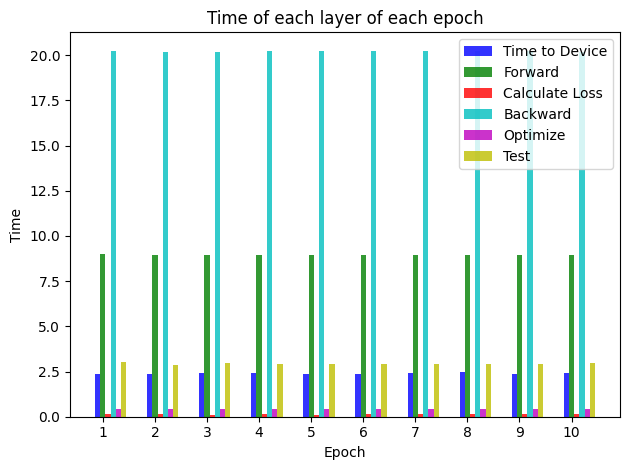

In [99]:
# plot each epoch's time to device, forward, calculate loss, backward, optimize, test using matplotlib with bar chart in one figure
fig, ax = plt.subplots()
index = np.arange(10)
bar_width = 0.1
opacity = 0.8
rects1 = plt.bar(index, Time_AllRoundAvg[:,0].T, bar_width, alpha=opacity, color='b', label='Time to Device')
rects2 = plt.bar(index+bar_width, Time_AllRoundAvg[:,1].T, bar_width, alpha=opacity, color='g', label='Forward')
rects3 = plt.bar(index+2*bar_width, Time_AllRoundAvg[:,2].T, bar_width, alpha=opacity, color='r', label='Calculate Loss')
rects4 = plt.bar(index+3*bar_width, Time_AllRoundAvg[:,3].T, bar_width, alpha=opacity, color='c', label='Backward')
rects5 = plt.bar(index+4*bar_width, Time_AllRoundAvg[:,4].T, bar_width, alpha=opacity, color='m', label='Optimize')
rects6 = plt.bar(index+5*bar_width, Time_AllRoundAvg[:,5].T, bar_width, alpha=opacity, color='y', label='Test')
plt.xlabel('Epoch')
plt.ylabel('Time(s)')
plt.title('Time of each layer of each epoch')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.legend()
plt.tight_layout()
plt.show()

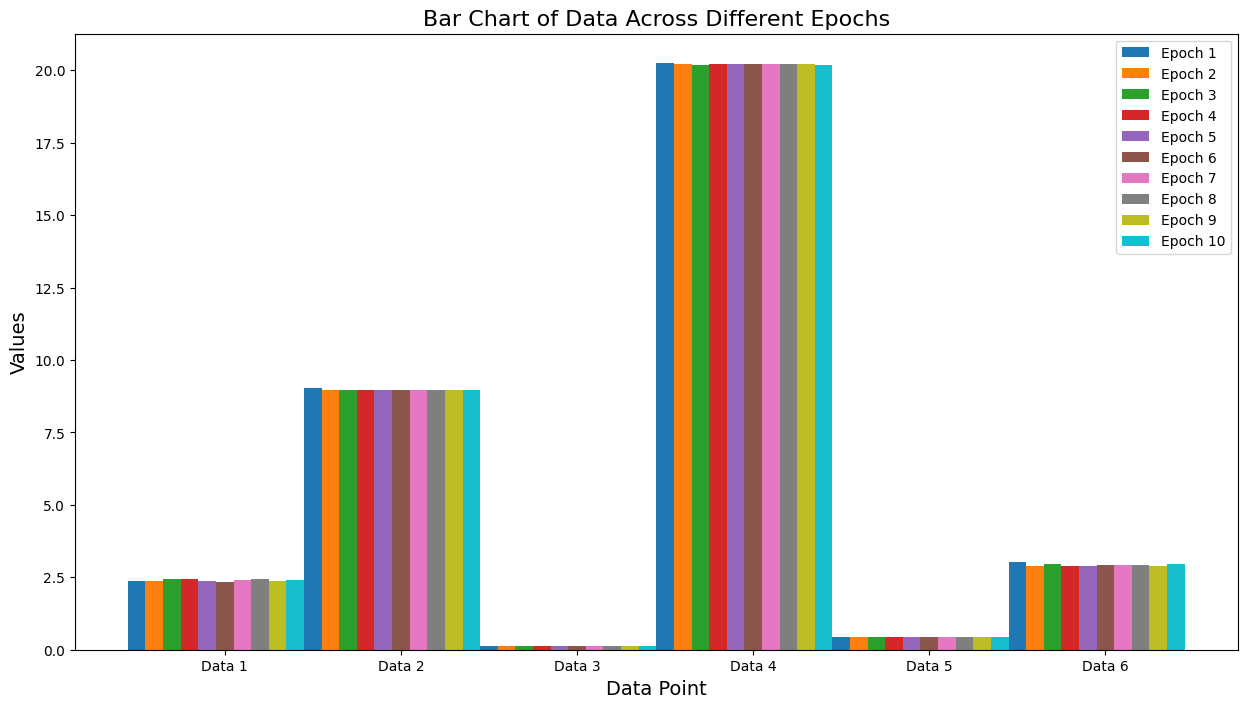

In [100]:
# Number of epochs
epochs = Time_AllRoundAvg.shape[0]
# Setting up the bar chart
fig, ax = plt.subplots(figsize=(15, 8))
# Width of a bar
bar_width = 0.1
# Creating an index for each set of bars
index = np.arange(Time_AllRoundAvg.shape[1])
# Plotting each epoch's data
for i in range(epochs):
    ax.bar(index + i*bar_width, Time_AllRoundAvg[i, :], bar_width, label=f'Epoch {i+1}')
# Adding labels and title
ax.set_xlabel('Data Point', fontsize=14)
ax.set_ylabel('Values', fontsize=14)
ax.set_title('Bar Chart of Data Across Different Epochs', fontsize=16)
ax.set_xticks(index + bar_width * epochs / 2)
ax.set_xticklabels([f'Data {i+1}' for i in range(Time_AllRoundAvg.shape[1])])
ax.legend()
# Showing the plot
plt.show()

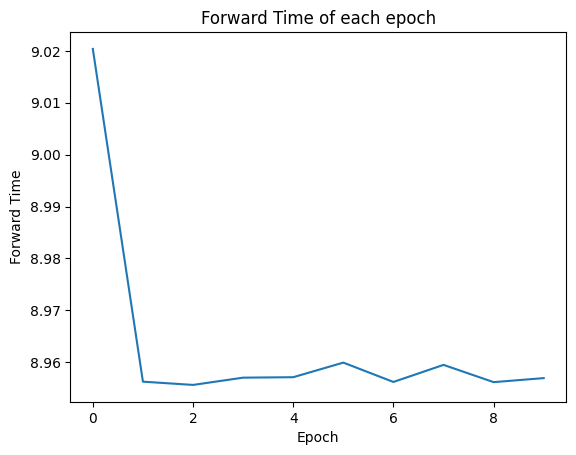

In [101]:
# plot the Forward time of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,1].T)
plt.xlabel('Epoch')
plt.ylabel('Forward Time')
plt.title('Forward Time of each epoch')
plt.show()

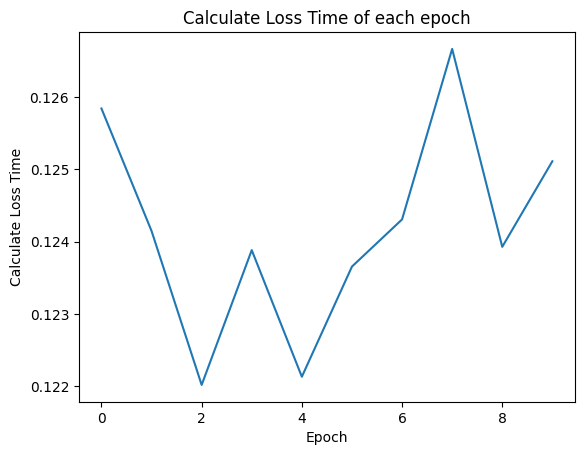

In [102]:
# plot the Calculate Loss of each epoch using matplotlib with line in one figure
plt.plot(Time_AllRoundAvg[:,2].T)
plt.xlabel('Epoch')
plt.ylabel('Calculate Loss Time')
plt.title('Calculate Loss Time of each epoch')
plt.show()

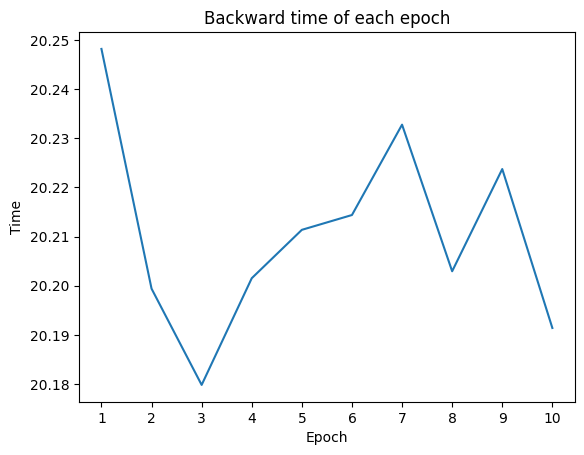

In [103]:
# plot the Backward time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,3].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Backward time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

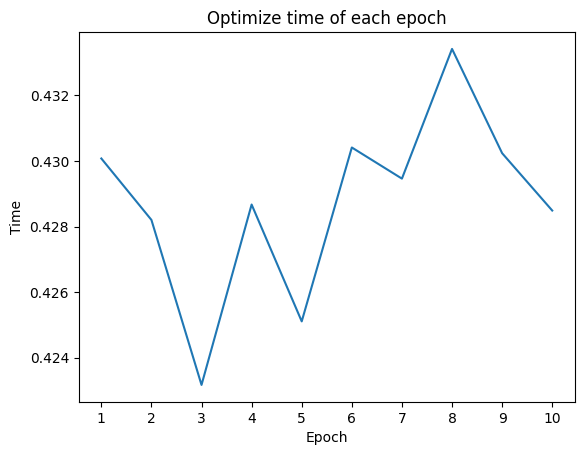

In [104]:
# plot the Optimize time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,4].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Optimize time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

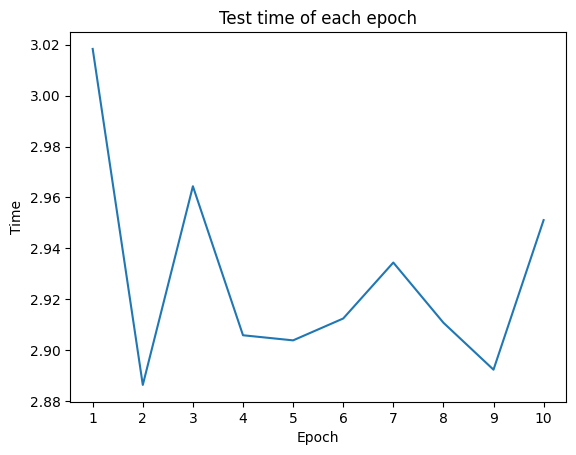

In [105]:
# plot the Test time of each epoch using matplotlib with line in one figure
fig, ax = plt.subplots()
index = np.arange(10)
plt.plot(index, Time_AllRoundAvg[:,5].T)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Test time of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))
plt.show()

#### Energy_AllRound 

In [106]:
print(Energy_AllRound.shape)
# create a ndarray to store the average running time of each epoch
TimeRecorded_Total = np.zeros((Round,Epoch,1))
EnergyRecorded = np.zeros((Round,Epoch,1))
for i in range(len(Energy_AllRound)):
    # print('In round ', i+1, ': \n')
    for j in range(len(Energy_AllRound[i])):
        # print('Epoch ', j+1, 'The total recorded time is: ', len(Energy_AllRound[i][j][0]))
        TimeRecorded_Total[i,j,0] = len(Energy_AllRound[i][j][0])
        EnergyRecorded[i,j,0] = np.sum(Energy_AllRound[i][j][0])

(10, 10, 1)


In [107]:
print(TimeRecorded_Total.shape)
# print(TimeRecorded_Total)
TimeRecorded_Avg = np.sum(TimeRecorded_Total, axis=0)/Round
print(TimeRecorded_Avg.shape)
print(TimeRecorded_Avg.T)

print(EnergyRecorded.shape)
# print(EnergyRecorded)
EnergyRecorded_Avg = np.sum(EnergyRecorded, axis=0)/Round
print(EnergyRecorded_Avg.shape)
print(EnergyRecorded_Avg.T)

(10, 10, 1)
(10, 1)
[[40.  39.7 39.8 39.8 39.8 39.8 39.8 39.8 39.8 39.8]]
(10, 10, 1)
(10, 1)
[[11167.832 11163.703 11196.265 11202.92  11229.743 11266.973 11221.005
  11233.355 11262.49  11254.654]]


In [108]:
# calculate the total energy of each round
Energy_Total = np.sum(EnergyRecorded_Avg, axis=0)
print('The average total energy consumption of each round running is: ', Energy_Total, 'J')

# calculate the total time of each round
Time_Total = np.sum(TimeRecorded_Avg, axis=0)
print('The average total time of each round running is: ', Time_Total, 's')

The average total energy consumption of each round running is:  [112198.94] J
The average total time of each round running is:  [398.1] s


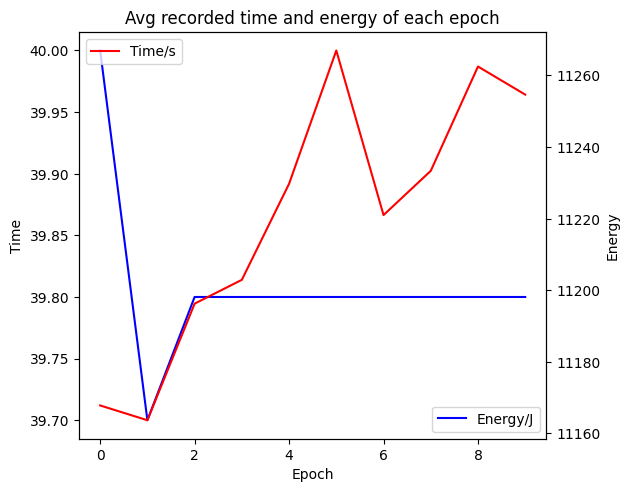

In [109]:
# plot the avg recorded time of each epoch and energy using matplotlib with line in one figure, the left axis is the time and the right axis is the energy
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Time')
ax1.plot(TimeRecorded_Avg, color='b')
plt.legend(['Energy/J'], loc='lower right')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Energy')
ax2.plot(EnergyRecorded_Avg, color='r')
ax2.tick_params(axis='y')
fig.tight_layout()
plt.title('Avg recorded time and energy of each epoch')
plt.legend(['Time/s'], loc='upper left')
plt.show()

#### TimeEpoch_AllRound

In [110]:
print(TimeEpoch_AllRound.shape)
# print(TimeEpoch_AllRound)

TimeEpoch_Round = np.zeros((Round,Epoch,1))
for i in range(TimeEpoch_AllRound.shape[0]):
    TimeEpoch_Roundi = TimeEpoch_AllRound[i,:,:]
    # print(TimeEpoch_Roundi.shape)
    time_temp = np.zeros((TimeEpoch_Roundi.shape[0],1))
    for j in range(TimeEpoch_Roundi.shape[0]):
        if j == 0:
            time_temp[j,0] = TimeEpoch_Roundi[j,0]
        else:
            time_temp[j,0] = TimeEpoch_Roundi[j,0] - TimeEpoch_Roundi[j-1,0]
    TimeEpoch_Round[i,:,:] = time_temp
    
print(TimeEpoch_Round.shape)
# print(TimeEpoch_Round)
TimeEpoch_RoundAvg = np.sum(TimeEpoch_Round, axis=0)/Round
print(TimeEpoch_RoundAvg.shape)
print('The average time of each epoch is: \n', TimeEpoch_RoundAvg.T)

(10, 10, 1)
(10, 10, 1)
(10, 1)
The average time of each epoch is: 
 [[39.50603998 39.26866734 39.44659119 39.36895497 39.35284317 39.28532307
  39.45812097 39.45170536 39.3326334  39.38181186]]


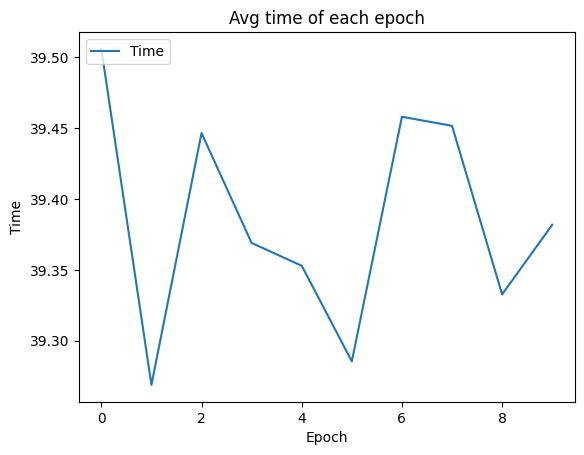

In [111]:
# plot the avg time of each epoch using matplotlib with line in one figure
plt.plot(TimeEpoch_RoundAvg)
plt.xlabel('Epoch')
plt.ylabel('Time')
plt.title('Avg time of each epoch')
plt.legend(['Time'], loc='upper left')
plt.show()

#### train loss, acc and test acc

In [112]:
print(TrainLoss_AllRound.shape)
print(TrainAcc_AllRound.shape)
print(TestAcc_AllRound.shape)

(10, 10, 1)
(10, 10, 1)
(10, 10, 1)


In [113]:
# get the average train loss of each epoch
TrainLoss_RoundAvg = np.sum(TrainLoss_AllRound, axis=0)/Round
print(TrainLoss_RoundAvg.shape)
print('The avg train loss of each epoch is: \n', TrainLoss_RoundAvg.T)

# get the average train accuracy of each epoch
TrainAcc_RoundAvg = np.sum(TrainAcc_AllRound, axis=0)/Round
print(TrainAcc_RoundAvg.shape)
print('The avg train acc of each epoch is: \n', TrainAcc_RoundAvg.T)

# get the average test accuracy of each epoch
TestAcc_RoundAvg = np.sum(TestAcc_AllRound, axis=0)/Round
print(TestAcc_RoundAvg.shape)
print('The avg test acc of each epoch is: \n',TestAcc_RoundAvg.T)

(10, 1)
The avg train loss of each epoch is: 
 [[2.30137722 2.19046947 1.66307733 1.22549832 0.98506141 0.79535422
  0.6553612  0.575933   0.52155114 0.47636903]]
(10, 1)
The avg train acc of each epoch is: 
 [[0.12094    0.22997833 0.40159833 0.53704    0.62934333 0.697125
  0.74973    0.78102333 0.80375667 0.82047833]]
(10, 1)
The avg test acc of each epoch is: 
 [[0.16979 0.34407 0.46545 0.5954  0.64628 0.71555 0.74596 0.79497 0.79317
  0.81135]]


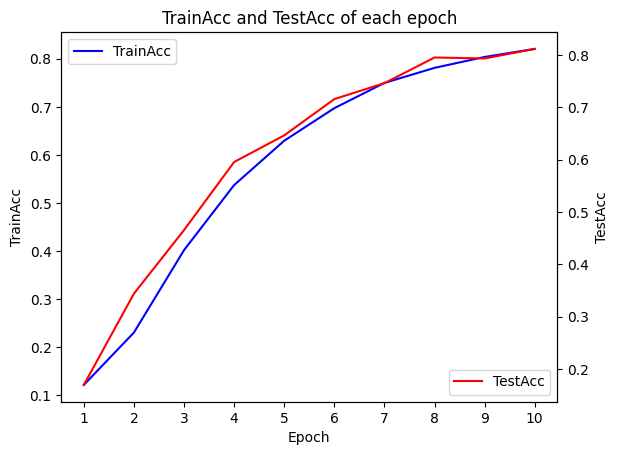

In [114]:
# plot the TrainAcc and TestAcc of each epoch using matplotlib with line in one figure, the left y-axis is for TrainAcc and the right y-axis is for TestAcc
# add the legend for TrainAcc and TestAcc, put it to the bottom right
fig, ax1 = plt.subplots()
index = np.arange(10)
plt.plot(index, TrainAcc_RoundAvg, 'b-')
plt.xlabel('Epoch')
plt.ylabel('TrainAcc')
plt.legend(['TrainAcc'], loc='upper left')
plt.title('TrainAcc and TestAcc of each epoch')
plt.xticks(index, ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'))

ax2 = ax1.twinx()
plt.plot(index, TestAcc_RoundAvg, 'r-')
plt.ylabel('TestAcc')
plt.legend(['TestAcc'], loc='lower right')
plt.show()
